In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
dfhead = pd.read_csv('NBAFutures1.csv')
dftail = pd.read_csv('NBAFuturesTest1.csv')
df = dfhead.append(dftail, ignore_index = True)
df.head()

,Unnamed: 0,Player,Year,Pos,Age,Tm,G,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,PTS2,TRB2,AST2,STL2,BLK2
0,0,Kareem Abdul-Jabbar,1980,C,32,LAL,82,38.3,10.2,16.9,...,1.0,3.4,3.6,2.6,24.8,26.2,10.3,3.4,0.7,2.9
1,1,Kareem Abdul-Jabbar,1981,C,33,LAL,80,37.2,10.5,18.2,...,0.7,2.9,3.1,3.1,26.2,23.9,8.7,3.0,0.8,2.7
2,2,Kareem Abdul-Jabbar,1982,C,34,LAL,76,35.2,9.9,17.1,...,0.8,2.7,3.0,2.9,23.9,21.8,7.5,2.5,0.8,2.2
3,3,Kareem Abdul-Jabbar,1983,C,35,LAL,79,32.3,9.1,15.5,...,0.8,2.2,2.5,2.8,21.8,21.5,7.3,2.6,0.7,1.8
4,4,Kareem Abdul-Jabbar,1984,C,36,LAL,80,32.8,9.0,15.5,...,0.7,1.8,2.8,2.6,21.5,22.0,7.9,3.2,0.8,2.1


In [2]:
df = df.drop(['Unnamed: 0'], axis=1)

In [3]:
df = df[['Player','Age','PTS','TRB','AST','STL','BLK','PTS2','TRB2','AST2','STL2','BLK2']]

In [5]:
df1 = df.set_index('Player')

In [79]:
#Stationarize?
#Try to predict Diffs
#Then just add

In [80]:
dum1 = pd.get_dummies(df['Pos'])
dum2 = pd.get_dummies(df['Tm'])
df1 = pd.concat([df, dum1, dum2], axis=1)
df1 = df1.drop(['Pos','Tm'], axis=1)
df1 = df1.set_index('Player')
df1.head()

,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,...,SAC,SAS,SDC,SEA,TOR,TOT,UTA,VAN,WAS,WSB
Player,,,,,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,1980,32,82,38.3,10.2,16.9,0.0,0.0,10.2,16.9,...,0,0,0,0,0,0,0,0,0,0
Kareem Abdul-Jabbar,1981,33,80,37.2,10.5,18.2,0.0,0.0,10.5,18.2,...,0,0,0,0,0,0,0,0,0,0
Kareem Abdul-Jabbar,1982,34,76,35.2,9.9,17.1,0.0,0.0,9.9,17.1,...,0,0,0,0,0,0,0,0,0,0
Kareem Abdul-Jabbar,1983,35,79,32.3,9.1,15.5,0.0,0.0,9.1,15.5,...,0,0,0,0,0,0,0,0,0,0
Kareem Abdul-Jabbar,1984,36,80,32.8,9.0,15.5,0.0,0.0,9.0,15.5,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df2 = df.drop(['Pos','Tm'], axis=1)
df2 = df2.set_index('Player')
df2.head()

,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,...,STL,BLK,TOV,PF,PTS,PTS2,TRB2,AST2,STL2,BLK2
Player,,,,,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,1980,32,82,38.3,10.2,16.9,0.0,0.0,10.2,16.9,...,1.0,3.4,3.6,2.6,24.8,26.2,10.3,3.4,0.7,2.9
Kareem Abdul-Jabbar,1981,33,80,37.2,10.5,18.2,0.0,0.0,10.5,18.2,...,0.7,2.9,3.1,3.1,26.2,23.9,8.7,3.0,0.8,2.7
Kareem Abdul-Jabbar,1982,34,76,35.2,9.9,17.1,0.0,0.0,9.9,17.1,...,0.8,2.7,3.0,2.9,23.9,21.8,7.5,2.5,0.8,2.2
Kareem Abdul-Jabbar,1983,35,79,32.3,9.1,15.5,0.0,0.0,9.1,15.5,...,0.8,2.2,2.5,2.8,21.8,21.5,7.3,2.6,0.7,1.8
Kareem Abdul-Jabbar,1984,36,80,32.8,9.0,15.5,0.0,0.0,9.0,15.5,...,0.7,1.8,2.8,2.6,21.5,22.0,7.9,3.2,0.8,2.1


In [6]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['PTS2','TRB2','AST2','STL2','BLK2']
for du in dum:
    cols.remove(du)

In [7]:
cols_at_end = ['PTS2','BLK2','STL2','AST2','TRB2']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
df1.head()

,Age,PTS,TRB,AST,STL,BLK,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,
Kareem Abdul-Jabbar,32,24.8,10.8,4.5,1.0,3.4,26.2,2.9,0.7,3.4,10.3
Kareem Abdul-Jabbar,33,26.2,10.3,3.4,0.7,2.9,23.9,2.7,0.8,3.0,8.7
Kareem Abdul-Jabbar,34,23.9,8.7,3.0,0.8,2.7,21.8,2.2,0.8,2.5,7.5
Kareem Abdul-Jabbar,35,21.8,7.5,2.5,0.8,2.2,21.5,1.8,0.7,2.6,7.3
Kareem Abdul-Jabbar,36,21.5,7.3,2.6,0.7,1.8,22.0,2.1,0.8,3.2,7.9


In [84]:
df1['PTS2'] = df1['PTS2'] - df1['PTS']
df1['BLK2'] = df1['BLK2'] - df1['BLK']
df1['STL2'] = df1['STL2'] - df1['STL']
df1['AST2'] = df1['AST2'] - df1['AST']
df1['TRB2'] = df1['TRB2'] - df1['TRB']
df1.head()

,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,...,TOT,UTA,VAN,WAS,WSB,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,1980,32,82,38.3,10.2,16.9,0.0,0.0,10.2,16.9,...,0,0,0,0,0,1.4,-0.5,-0.3,-1.1,-0.5
Kareem Abdul-Jabbar,1981,33,80,37.2,10.5,18.2,0.0,0.0,10.5,18.2,...,0,0,0,0,0,-2.3,-0.2,0.1,-0.4,-1.6
Kareem Abdul-Jabbar,1982,34,76,35.2,9.9,17.1,0.0,0.0,9.9,17.1,...,0,0,0,0,0,-2.1,-0.5,0.0,-0.5,-1.2
Kareem Abdul-Jabbar,1983,35,79,32.3,9.1,15.5,0.0,0.0,9.1,15.5,...,0,0,0,0,0,-0.3,-0.4,-0.1,0.1,-0.2
Kareem Abdul-Jabbar,1984,36,80,32.8,9.0,15.5,0.0,0.0,9.0,15.5,...,0,0,0,0,0,0.5,0.3,0.1,0.6,0.6


In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#cols = df1.columns
sc1 = StandardScaler()
for col in cols:
    df1[[col]] = sc1.fit_transform(df1[[col]])
sc2 = StandardScaler()
df1[['PTS2']] = sc2.fit_transform(df1[['PTS2']])    
sc3 = StandardScaler()
df1[['BLK2']] = sc3.fit_transform(df1[['BLK2']])
sc4 = StandardScaler()
df1[['STL2']] = sc4.fit_transform(df1[['STL2']])
sc5 = StandardScaler()
df1[['AST2']] = sc5.fit_transform(df1[['AST2']])
sc6 = StandardScaler()
df1[['TRB2']] = sc6.fit_transform(df1[['TRB2']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Age,PTS,TRB,AST,STL,BLK,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,
Kareem Abdul-Jabbar,1.407294,2.542378,2.635391,1.235413,0.536671,5.430987,2.764691,4.662253,0.008694,0.721331,2.471482
Kareem Abdul-Jabbar,1.662855,2.772446,2.443237,0.669076,-0.083946,4.504145,2.400079,4.283902,0.210459,0.516001,1.871146
Kareem Abdul-Jabbar,1.918416,2.394478,1.828344,0.463136,0.122926,4.133409,2.067173,3.338025,0.210459,0.259338,1.420895
Kareem Abdul-Jabbar,2.173977,2.049376,1.367174,0.205710,0.122926,3.206567,2.019615,2.581323,0.008694,0.310671,1.345853
Kareem Abdul-Jabbar,2.429538,2.000076,1.290312,0.257195,-0.083946,2.465093,2.098878,3.148849,0.210459,0.618666,1.570979


In [9]:
df3 = df1[0:len(dfhead)]
df4 = df1[len(dfhead):]

In [13]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [6], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [6], axis=1)
test_x=tests[0]
test_y=tests[1]

In [14]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [15]:
test_y.tail()

,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,
Derrick White,0.180704,0.500392,0.613990,0.977994,-0.004901
C.J. Williams,-0.976542,-0.823836,-0.596603,-0.613315,-1.205571
D.J. Wilson,-0.469256,-0.067134,-0.596603,-0.459318,0.332788
Guerschon Yabusele,-1.024100,-0.445485,-1.000133,-0.818645,-0.905404
Ante Zizic,-0.152202,-0.067134,-1.000133,-0.561983,0.632955


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


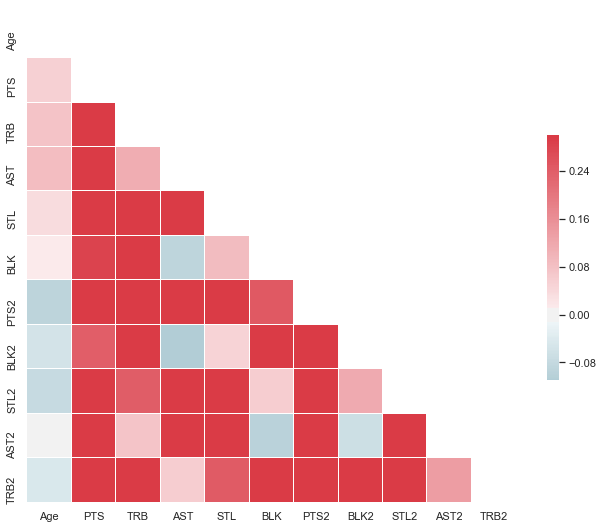

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

## Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
reg = LinearRegression().fit(train_x.values, train_y.PTS2.values)

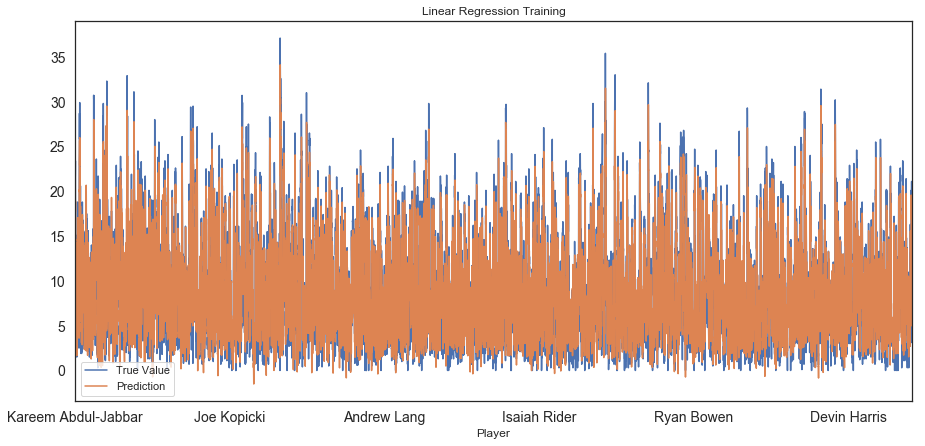

adj train r^2 = 0.7541486117612944
train mse = 9.628729046138059


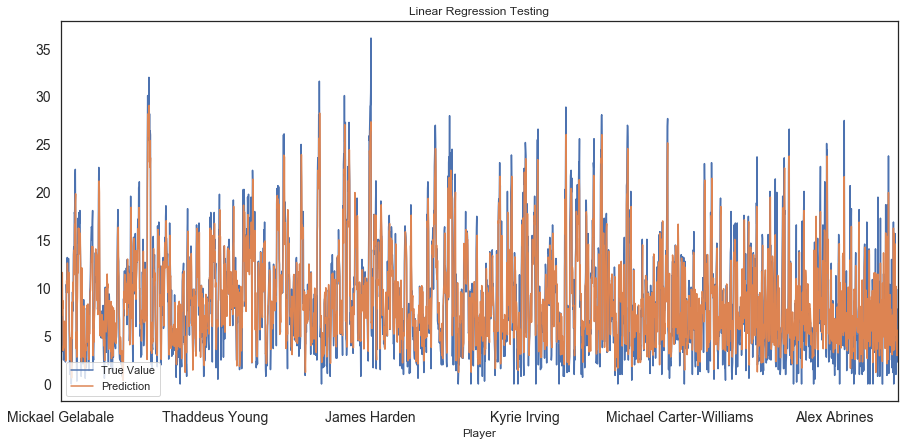

adj test r^2 = 0.7081344049281318
test mse = 10.023991182186029


In [18]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
test_y2['PTS2'] = sc2.inverse_transform(test_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))
test_y2['PTS2'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PTS2, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PTS2, test_y2.prediction)))

## Extra Trees

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000, bootstrap=True)
reg.fit(train_x.values, train_y.PTS2.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

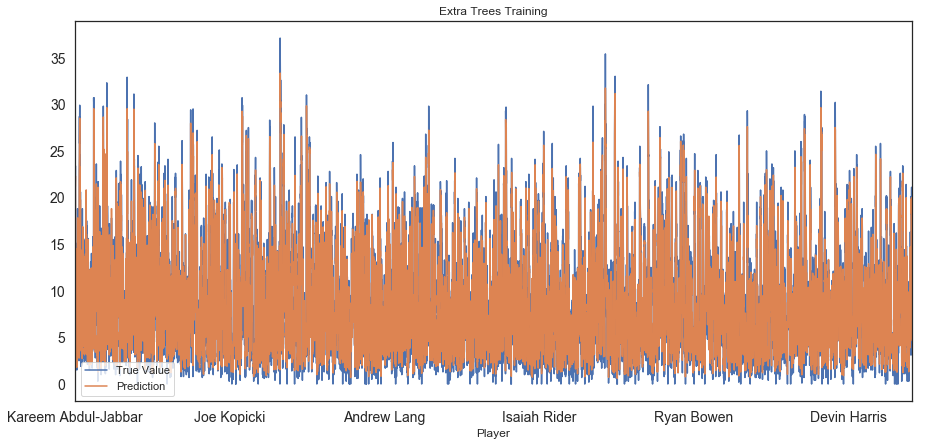

adj train r^2 = 0.9654487127288206
train mse = 1.353195463783388


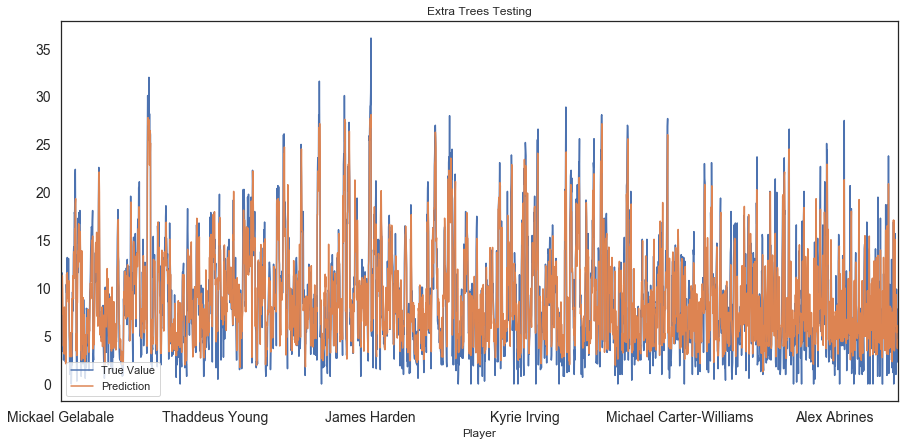

adj test r^2 = 0.6897277590424741
test mse = 10.656159067564989


In [20]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
test_y2['PTS2'] = sc2.inverse_transform(test_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))
test_y2['PTS2'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PTS2, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PTS2, test_y2.prediction)))

## Random Forrest

In [21]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.PTS2.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

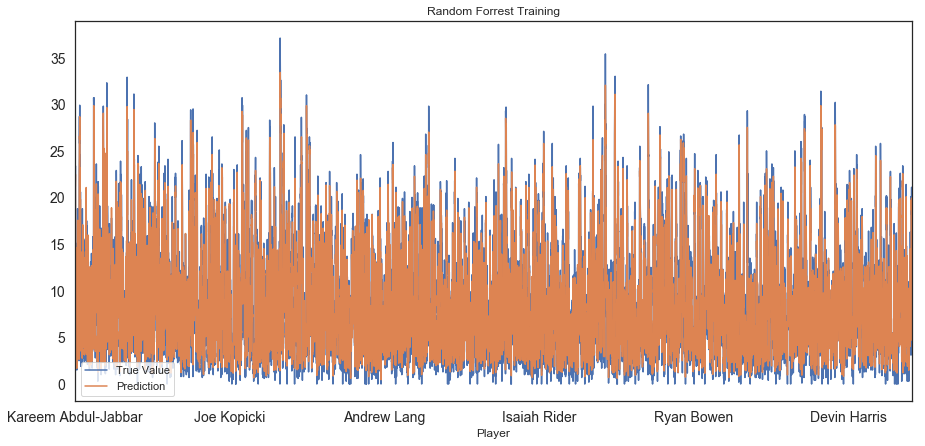

adj train r^2 = 0.9647028320685453
train mse = 1.3824077567462085


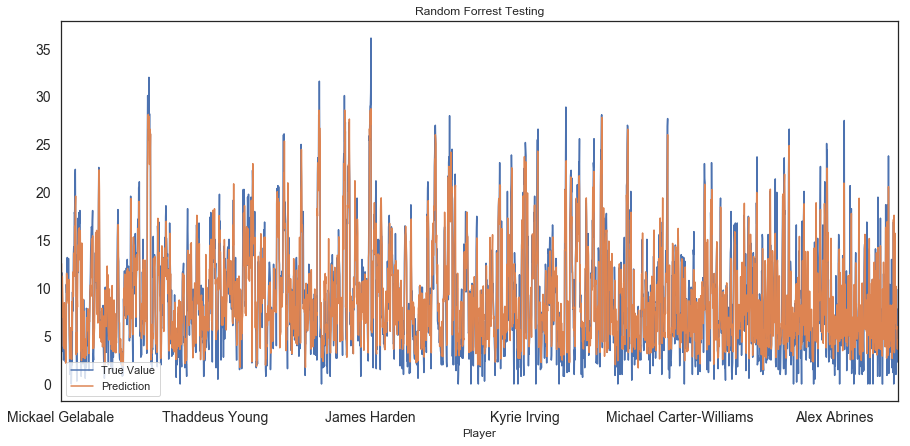

adj test r^2 = 0.684071787340521
test mse = 10.850410844493718


In [22]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
test_y2['PTS2'] = sc2.inverse_transform(test_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))
test_y2['PTS2'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PTS2, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PTS2, test_y2.prediction)))

## XGBoost

In [23]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [24]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.PTS2.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

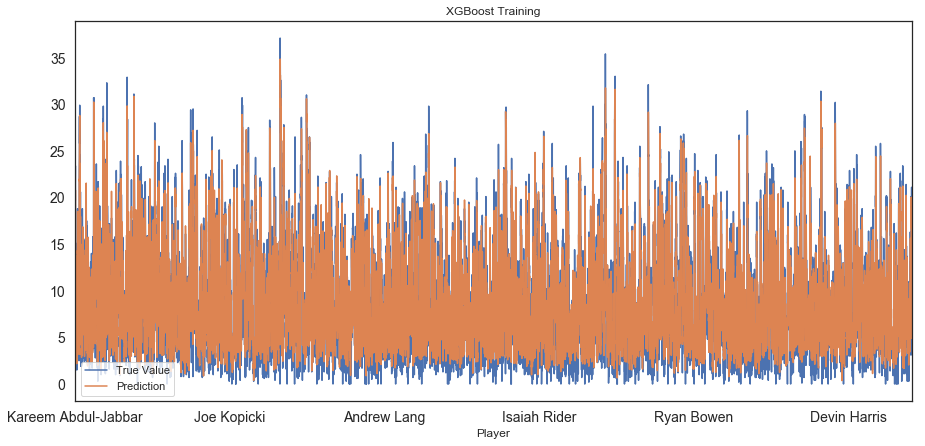

adj train r^2 = 0.8110291565498178
train mse = 7.401011896810255


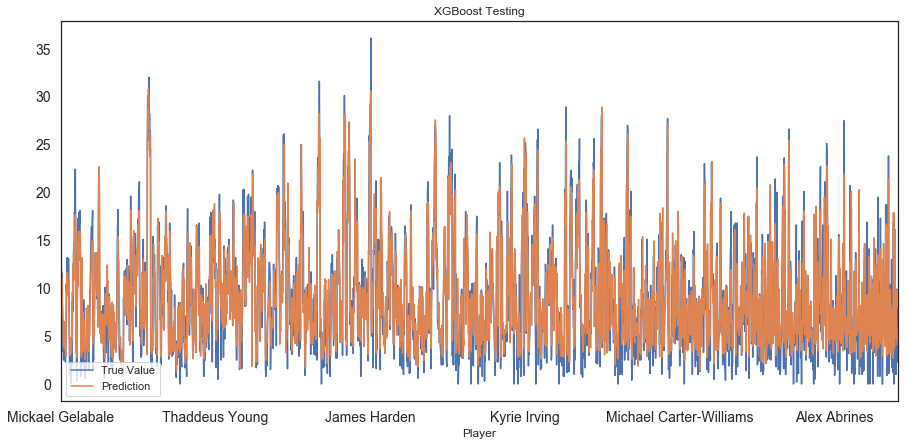

adj test r^2 = 0.6928281150698076
test mse = 10.54967874921169


In [25]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
test_y2['PTS2'] = sc2.inverse_transform(test_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))
test_y2['PTS2'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PTS2, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PTS2, test_y2.prediction)))

## Neural Network

In [26]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

Using TensorFlow backend.


In [28]:
K.clear_session()
model = Sequential()
model.add(Dense(128, input_dim=6, activation='tanh'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=True)
out = model.fit(train_x.values, train_y.PTS2.values, validation_data=[test_x.values, test_y['PTS2'].values.ravel()], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])

Instructions for updating:
Use tf.cast instead.


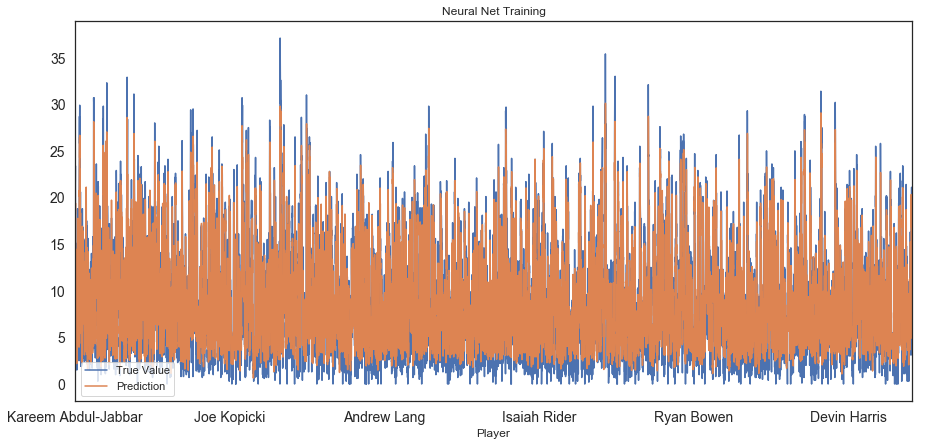

adj train r^2 = 0.763721763200553
train mse = 9.253798149930265


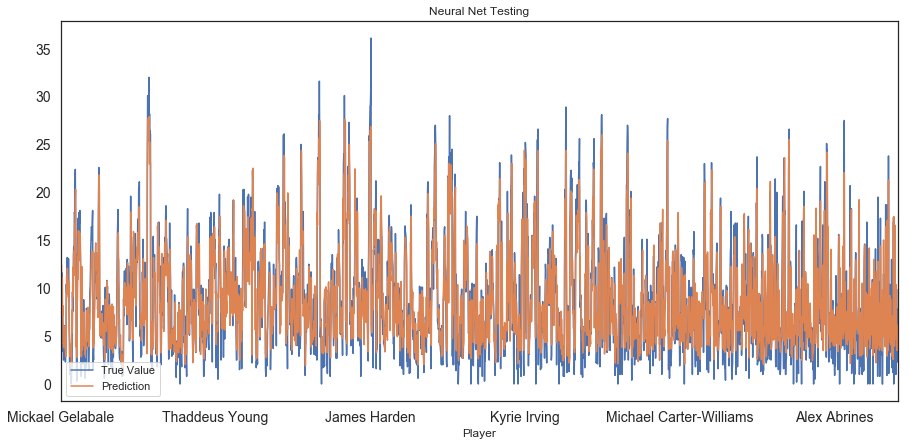

adj test r^2 = 0.709572859612665
test mse = 9.974588109959635


In [29]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
test_y2['PTS2'] = sc2.inverse_transform(test_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))
test_y2['PTS2'].plot(figsize=(15,7), title= 'Neural Net Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Neural Net Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PTS2, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PTS2, test_y2.prediction)))

## LSTM

In [30]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [31]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(100, input_shape=(1, train_x.values.shape[1]), recurrent_activation='tanh'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.PTS2.values.ravel(), validation_data=[X_tst_t, test_y['PTS2'].values.ravel()], epochs=50, verbose=1, shuffle=False, callbacks=[early_stop])

Train on 10827 samples, validate on 2707 samples
Epoch 1/50
10827/10827 [==============================] - 5s 431us/step - loss: 0.5415 - val_loss: 0.3469
Epoch 2/50
10827/10827 [==============================] - 3s 260us/step - loss: 0.3015 - val_loss: 0.2813
Epoch 3/50
10827/10827 [==============================] - 3s 270us/step - loss: 0.2607 - val_loss: 0.2649
Epoch 4/50
10827/10827 [==============================] - 3s 245us/step - loss: 0.2479 - val_loss: 0.2575
Epoch 5/50
10827/10827 [==============================] - 3s 264us/step - loss: 0.2424 - val_loss: 0.2542
Epoch 6/50
10827/10827 [==============================] - 3s 271us/step - loss: 0.2398 - val_loss: 0.2528
Epoch 7/50
10827/10827 [==============================] - 3s 275us/step - loss: 0.2384 - val_loss: 0.2522
Epoch 8/50
10827/10827 [==============================] - 3s 246us/step - loss: 0.2375 - val_loss: 0.2519
Epoch 9/50
10827/10827 [==============================] - 3s 261us/step - loss: 0.2370 - val_loss: 0.25

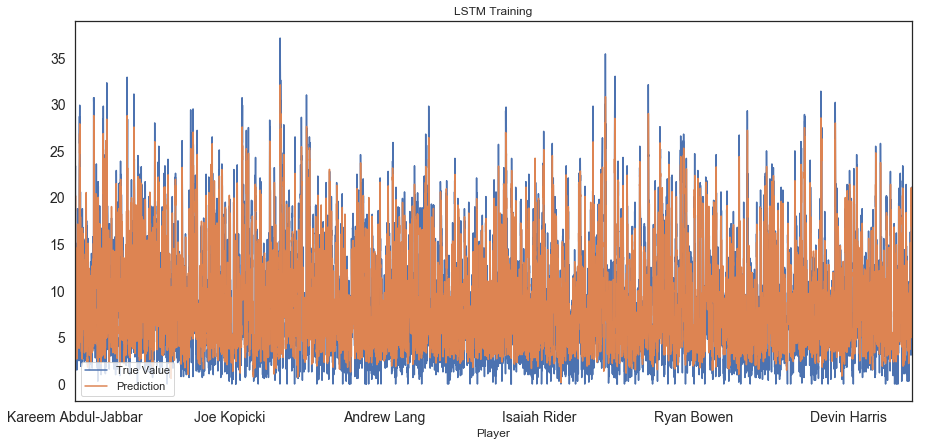

adj train r^2 = 0.7658150121640351
train mse = 9.17181639973608


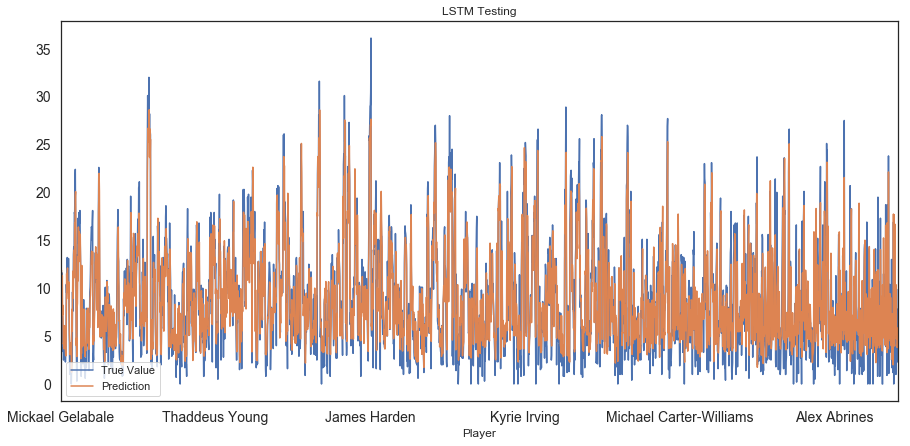

adj test r^2 = 0.7094476580471062
test mse = 9.978888100812785


In [32]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
test_y2['PTS2'] = sc2.inverse_transform(test_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))
test_y2['PTS2'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PTS2, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PTS2, test_y2.prediction)))

## TPOT

In [33]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(max_time_mins=1, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.PTS2.values.ravel())

/anaconda3/lib/python3.7/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)



1.0726951666666666 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: ElasticNetCV(input_matrix, l1_ratio=0.65, tol=0.1)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=1, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=100,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=1,
       warm_start=False)

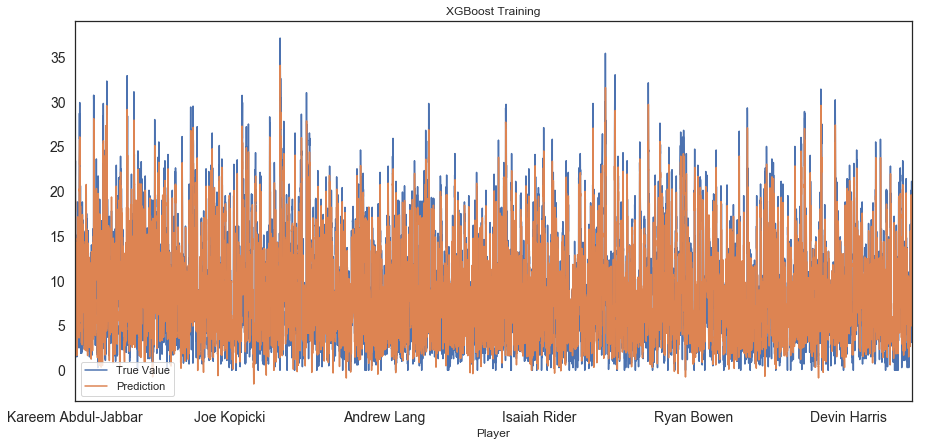

adj train r^2 = 0.7541001267357142
train mse = 9.630627954163145


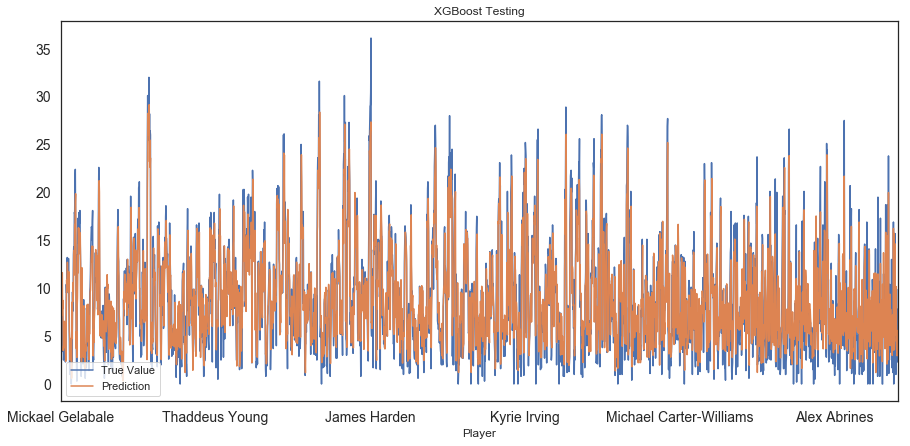

adj test r^2 = 0.7080731937135794
test mse = 10.026093453523542


In [34]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
test_y2['PTS2'] = sc2.inverse_transform(test_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))
test_y2['PTS2'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PTS2, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PTS2, test_y2.prediction)))

## Predictions

In [35]:
train=df3
test=df4
trains = np.split(train, [6], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [6], axis=1)
test_x=tests[0]
test_y=tests[1]

In [36]:
test_y.head()

,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,
Alex Abrines,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Quincy Acy,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Jaylen Adams,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Steven Adams,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Bam Adebayo,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176


In [42]:
from sklearn.feature_selection import RFE
cols_at_end = ['TRB2','AST2','STL2','BLK2','PTS2']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    train_x3 = train_x
    test_x3 = test_x
    X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
    X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])
    K.clear_session()
    model = Sequential()
    model.add(Dense(128, input_dim=6, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='Adam', loss='mean_squared_error')
    early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=True)
    out = model.fit(train_x3.values, train_y[col].values, validation_data=[test_x3.values, test_y[col].values.ravel()], epochs=100, verbose=0, shuffle=False, callbacks=[early_stop])
    test_y2[col] = scalar.inverse_transform(model.predict(test_x3))

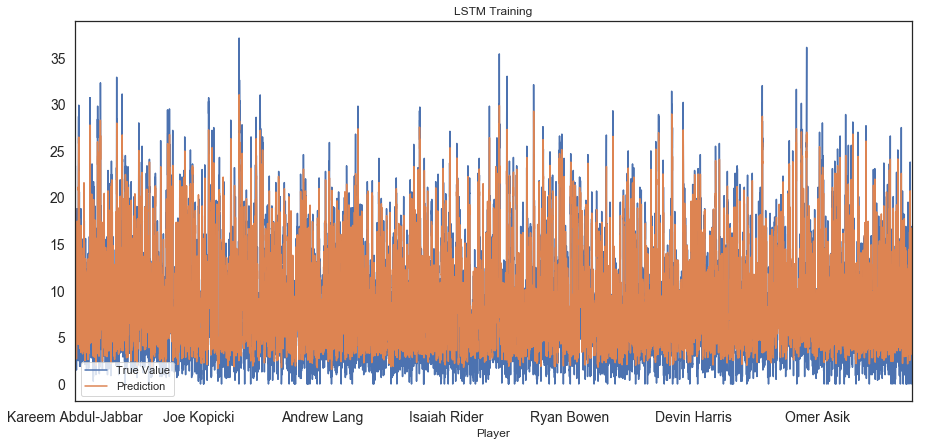

adj train r^2 = 0.7513194782996465
train mse = 9.502176340922652


In [45]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x3))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))

In [46]:
test_y2['Value'] = 1*test_y2['PTS2'] + 1.2*test_y2['TRB2'] + 1.5*test_y2['AST2'] + 3*test_y2['STL2'] + 3*test_y2['BLK2']
test_y2.sort_values('Value', ascending=False).head(10)

,PTS2,BLK2,STL2,AST2,TRB2,Value
Player,,,,,,
Anthony Davis,25.150925,2.188056,1.464858,3.996251,11.793607,56.256374
James Harden,30.535023,0.648222,1.749912,6.904784,6.517186,55.907227
Giannis Antetokounmpo,25.923306,1.293235,1.211295,5.738967,11.468469,55.807514
Joel Embiid,25.369452,1.766669,0.825244,3.823705,12.579660,53.976341
Russell Westbrook,20.569302,0.613596,1.717931,9.117636,9.538335,52.686340
Karl-Anthony Towns,23.728184,1.535399,0.941593,3.640280,11.913597,50.915897
LeBron James,24.024225,0.588436,1.262104,7.476655,7.763154,50.106613
Nikola Jokic,19.907042,0.685998,1.374261,6.982788,9.713382,48.218060
Paul George,25.388475,0.500106,1.784320,3.925411,7.440177,47.058083


In [47]:
dftail = pd.read_csv('NBAFuturesTest1.csv')
dftail = dftail[['Player','PTS','TRB','AST','STL','BLK']]
dftail['Value'] = 1*dftail['PTS'] + 1.2*dftail['TRB'] + 1.5*dftail['AST'] + 3*dftail['STL'] + 3*dftail['BLK']
dftail = dftail.set_index('Player')
dftail.sort_values('Value', ascending=False).head(10)

,PTS,TRB,AST,STL,BLK,Value
Player,,,,,,
James Harden,36.1,6.6,7.5,2.0,0.7,63.37
Giannis Antetokounmpo,27.7,12.5,5.9,1.3,1.5,59.95
Russell Westbrook,22.9,11.1,10.7,1.9,0.5,59.47
Anthony Davis,25.9,12.0,3.9,1.6,2.4,58.15
Joel Embiid,27.5,13.6,3.7,0.7,1.9,57.17
LeBron James,27.4,8.5,8.3,1.3,0.6,55.75
Karl-Anthony Towns,24.4,12.4,3.4,0.9,1.6,51.88
Paul George,28.0,8.2,4.1,2.2,0.4,51.79
Nikola Jokic,20.1,10.8,7.3,1.4,0.7,50.31


In [48]:
test_y2['Improved'] = test_y2['Value'] - dftail['Value']
test_y2.sort_values('Improved', ascending=False).head(20)

,PTS2,BLK2,STL2,AST2,TRB2,Value,Improved
Player,,,,,,,
Kobi Simmons,2.538845,0.174733,0.271401,0.582293,1.439342,6.477896,6.477896
Donte Grantham,2.518708,0.150975,0.257567,0.573004,1.312921,6.179346,6.179346
Tyler Ulis,2.518708,0.150975,0.257567,0.573004,1.312921,6.179346,6.179346
Ike Anigbogu,2.463093,0.467354,0.233356,0.595126,2.335031,8.259948,5.709948
Dzanan Musa,4.409037,0.151584,0.376500,0.845810,1.791630,9.411959,5.691959
Zhou Qi,4.080520,0.129858,0.274320,0.554897,1.255136,7.631564,5.631564
Trevon Duval,3.879585,0.119541,0.318578,1.186813,1.428169,8.687965,5.577965
Tyler Davis,2.254410,0.205417,0.235662,0.430865,2.120301,6.768306,5.568306
Malachi Richardson,3.421255,0.154186,0.248658,0.472361,1.694736,7.372011,5.252011


In [49]:
test_y2['Value2'] = test_y2['Improved']* test_y2['Value']
test_y2.sort_values('Value2', ascending=False).head(20)

,PTS2,BLK2,STL2,AST2,TRB2,Value,Improved,Value2
Player,,,,,,,,
Marvin Bagley,16.678507,1.023388,0.629796,1.851266,8.240858,34.303986,4.283986,146.957780
Wendell Carter,12.614060,1.276455,0.684143,2.245306,7.716861,31.124046,4.024046,125.244604
Jaren Jackson,15.655016,1.339166,0.895492,1.720592,5.811086,31.913177,3.923177,125.201060
Jarrett Allen,12.929448,1.459202,0.597181,1.846400,8.813923,32.444908,3.364908,109.174136
Mohamed Bamba,7.984640,1.446274,0.434493,1.204640,6.013387,22.649963,4.149963,93.996519
Mitchell Robinson,9.407820,2.209613,0.768393,1.174664,7.134752,28.665535,3.185535,91.315064
Kevin Knox,14.295833,0.396652,0.697297,1.561970,5.003189,25.924461,3.374461,87.481093
Deandre Ayton,17.684740,0.931916,0.928785,2.343570,10.137403,38.947083,2.187083,85.180483
Jayson Tatum,17.117676,0.699988,1.080554,2.486893,6.291732,33.739723,2.289723,77.254627


In [54]:
dftail = dftail.sort_values('Value', ascending=False)
test_y2 = test_y2.sort_values('Value', ascending=False)
dftail['Rank'] = range(len(dftail))
test_y2['Rank'] = range(len(test_y2))
dftail = dftail.sort_values('Player', ascending=True)
test_y2 = test_y2.sort_values('Player', ascending=True)

In [57]:
test_y2 = test_y2.drop(['Value2'], axis=1)

In [58]:
test_y2['RankOld'] = dftail['Rank']
test_y2.head()

,PTS2,BLK2,STL2,AST2,TRB2,Value,Improved,Rank,RankOld
Player,,,,,,,,,
Aaron Gordon,16.297844,0.648993,0.734813,3.429556,7.155249,34.179897,-0.450103,49,55
Aaron Holiday,6.915847,0.228565,0.513519,1.833514,1.686600,13.916288,1.806288,320,357
Abdel Nader,5.039440,0.244939,0.357063,0.556841,2.398912,10.559400,2.329400,422,435
Al Horford,11.999234,1.078546,0.798649,3.711699,6.174720,30.608032,-3.931968,72,57
Al-Farouq Aminu,8.363597,0.399657,0.680476,1.385177,6.610451,21.614304,-2.335696,158,155


In [63]:
test_y2['Jump'] = (test_y2['RankOld']+1)/(test_y2['Rank']+1)
test_y2.sort_values('Jump', ascending=False).head(20)

,PTS2,BLK2,STL2,AST2,TRB2,Value,Improved,Rank,RankOld,Jump
Player,,,,,,,,,,
Anthony Davis,25.150925,2.188056,1.464858,3.996251,11.793607,56.256374,-1.893626,0,3,4.000000
Marvin Bagley,16.678507,1.023388,0.629796,1.851266,8.240858,34.303986,4.283986,47,89,1.875000
Jaren Jackson,15.655016,1.339166,0.895492,1.720592,5.811086,31.913177,3.923177,62,116,1.857143
Luka Doncic,21.883118,0.366971,1.172974,5.970306,7.291722,44.208481,0.448481,12,23,1.846154
Wendell Carter,12.614060,1.276455,0.684143,2.245306,7.716861,31.124046,4.024046,68,123,1.797101
Jarrett Allen,12.929448,1.459202,0.597181,1.846400,8.813923,32.444908,3.364908,58,103,1.762712
Ben Simmons,17.464479,0.689269,1.399762,7.376148,8.130790,44.552742,-1.057258,11,18,1.583333
Mohamed Bamba,7.984640,1.446274,0.434493,1.204640,6.013387,22.649963,4.149963,148,225,1.516779
Kevin Knox,14.295833,0.396652,0.697297,1.561970,5.003189,25.924461,3.374461,114,172,1.504348
